In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter


In [2]:
sys.path.append(os.path.abspath("./../../../../research"))


In [3]:
from librarian_robot import downloading_datasets, map_classications_systems, transform_data



In [4]:
metadata_recategorized = pd.read_csv("./../data/metadata_recategorized.csv", index_col=0, sep="\t")

In [5]:
metadata_recategorized

idno author.name               title  year supergenre   genre  \
ne0001  ne0001      Baroja           Mayorazgo  1903  narrative  novela   
ne0002  ne0002      Galdos        Misericordia  1889  narrative  novela   
ne0003  ne0003      Galdos             Nazarin  1895  narrative  novela   
ne0004  ne0004      Galdos               Halma  1895  narrative  novela   
ne0005  ne0005      Galdos            Tristana  1892  narrative  novela   
...        ...         ...                 ...   ...        ...     ...   
ne0398  ne0398       Rueda           GusanoLuz  1889  narrative  novela   
ne0399  ne0399       Soler       MarcosVillari  1927  narrative  novela   
ne0401  ne0401   Verdaguer  IntelectualCarcoma  1934  narrative  novela   
ne0403  ne0403   Benavente       CartasMujeres  1893  narrative  novela   
ne0404  ne0404  Villalonga           Giacomini  1934  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  ...  \
ne0001                  realist          Spain   36912891.0   XX842743  ...   
ne0002                  realist          Spain   71395987.0  XX1014802  ...   
ne0003                  realist          Spain   71395987.0  XX1014802  ...   
ne0004                  realist          Spain   71395987.0  XX1014802  ...   
ne0005            bildungsroman          Spain   71395987.0  XX1014802  ...   
...                         ...            ...          ...        ...  ...   
ne0398                  realist          Spain   17371849.0  XX1022853  ...   
ne0399                   social          Spain   57499874.0   XX824185  ...   
ne0401            philosophical          Spain   32795004.0  XX1082221  ...   
ne0403              sentimental          Spain   64015709.0   XX835237  ...   
ne0404                   social          Spain   39392820.0  XX1080698  ...   

       author.movement_ordinal author.submovement_ordinal  \
ne0001                       1                          4   
ne0002                       0                          0   
ne0003                       0                          0   
ne0004                       0                          0   
ne0005                       0                          0   
...                        ...                        ...   
ne0398                       1                          2   
ne0399                       2                          7   
ne0401                       2                          6   
ne0403                       1                          5   
ne0404                       2                          6   

       authorText.relation_ordinal litHist.brow_ordinal setting.type_ordinal  \
ne0001                           0                  NaN                    1   
ne0002                           0                  NaN                    3   
ne0003                           0                  0.0                    -   
ne0004                           0                  NaN                    3   
ne0005                           0                  NaN                    3   
...                            ...                  ...                  ...   
ne0398                           1                  NaN                    1   
ne0399                           0                  NaN                    1   
ne0401                           0                  2.0                    -   
ne0403                           0                  NaN                    3   
ne0404                           0                  2.0                    2   

       time.period_ordinal protagonist.age_ordinal  \
ne0001                   3                       3   
ne0002                   3                       2   
ne0003                   3                       2   
ne0004                   3                       2   
ne0005                   3                       1   
...                    ...                     ...   
ne0398                   3                       -   
ne0399                   3        

In [6]:
metadata_recategorized.columns.tolist()

['idno',
 'author.name',
 'title',
 'year',
 'supergenre',
 'genre',
 'subgenre.cligs.important',
 'author.country',
 'author.viaf',
 'author.bne',
 'author.gender',
 'title.main',
 'title.viaf',
 'title.bne',
 'author.name.full',
 'subtitle',
 'availability',
 'subgenre.cligs',
 'date.file',
 'digital.source',
 'digital.source.format',
 'genre.subtitle',
 'narrator',
 'protagonist.gender',
 'setting.type',
 'form',
 'publication',
 'digital.source.idno',
 'author.continent',
 'authorText.group',
 'authorText.subgroup',
 'protagonist.name',
 'protagonist.age',
 'protagonist.socLevel',
 'protagonist.profession',
 'representation',
 'setting.continent',
 'setting.country',
 'setting.settlement',
 'setting.territory',
 'text.movement',
 'time.period',
 'time.span',
 'authorText.relation',
 'end',
 'time.year',
 'keywords.cert',
 'author.movement',
 'author.submovement',
 'author.date.birth',
 'author.date.death',
 'litHist.literaryQuality',
 'litHist.brow',
 'litHist.audience',
 'author.l

In [7]:
metadata_recategorized["title.main"]

ne0001         El mayorazgo de Labraz
ne0002                   Misericordia
ne0003                        Nazarín
ne0004                          Halma
ne0005                       Tristana
                     ...             
ne0398               El gusano de luz
ne0399                 Marcos Villarí
ne0401    Un intelectual y su carcoma
ne0403              Cartas de mujeres
ne0404                 Miss Giacomini
Name: title.main, Length: 358, dtype: object

In [8]:
metadata_recategorized[[column for column in metadata_recategorized.columns.tolist() if "author" in column]]

author.name author.country  author.viaf author.bne author.gender  \
ne0001      Baroja          Spain   36912891.0   XX842743          male   
ne0002      Galdos          Spain   71395987.0  XX1014802          male   
ne0003      Galdos          Spain   71395987.0  XX1014802          male   
ne0004      Galdos          Spain   71395987.0  XX1014802          male   
ne0005      Galdos          Spain   71395987.0  XX1014802          male   
...            ...            ...          ...        ...           ...   
ne0398       Rueda          Spain   17371849.0  XX1022853          male   
ne0399       Soler          Spain   57499874.0   XX824185          male   
ne0401   Verdaguer          Spain   32795004.0  XX1082221          male   
ne0403   Benavente          Spain   64015709.0   XX835237          male   
ne0404  Villalonga          Spain   39392820.0  XX1080698          male   

           author.name.full author.continent        authorText.group  \
ne0001           Pío Baroja           Europe            Tierra vasca   
ne0002  Benito Pérez Galdós           Europe  Novelas contemporáneas   
ne0003  Benito Pérez Galdós           Europe  Novelas contemporáneas   
ne0004  Benito Pérez Galdós           Europe  Novelas contemporáneas   
ne0005  Benito Pérez Galdós           Europe  Novelas contemporáneas   
...                     ...              ...                     ...   
ne0398       Salvador Rueda           Europe                     NaN   
ne0399      Bartolomé Soler           Europe                     NaN   
ne0401      Mario Verdaguer           Europe                     NaN   
ne0403    Jacinto Benavente           Europe                     NaN   
ne0404    Miguel Villalonga           Europe                     NaN   

                                      authorText.subgroup authorText.relation  \
ne0001                                                NaN                none   
ne0002             Novelas contemporáneas espiritualistas                none   
ne0003  Novelas contemporáneas espiritualistas: Ciclo ...                none   
ne0004  Novelas contemporáneas espiritualistas: Ciclo ...                none   
ne0005             Novelas contemporáneas espiritualistas                none   
...                                                   ...                 ...   
ne0398                                                NaN                 low   
ne0399                                                NaN                none   
ne0401                                                NaN                none   
ne0403                                                NaN                none   
ne0404                                                NaN                none   

       author.movement author.submovement  author.date.birth  \
ne0001       modernism       3-modernista               1872   
ne0002         realism           realista               1843   
ne0003         realism           realista               1843   
ne0004         realism           realista               1843   
ne0005         realism           realista               1843   
...                ...                ...                ...   
ne0398       modernism       1-modernista               1862   
ne0399      avantgarde    social-realista               1894   
ne0401      avantgarde       vanguardista               1885   
ne0403       modernism       4-modernista               1880   
ne0404      avantgarde       vanguardista               1899   

        author.date.death  author.litHist.pages author.nonNovelGenre  \
ne0001               1956                   117                essay   
ne0002               1920                   181              theatre   
ne0003               1920                   181              theatre   
ne0004               1920                   181              theatre   
ne0005               1920                   181              theatre   
...                   ...                   ...                  ..

In [9]:
metadata_recategorized["author.name.full"].unique()

array(['Pío Baroja', 'Benito Pérez Galdós', 'Alejandro Sawa',
       'Eduardo Zamacois', 'Manuel Ciges Aparicio',
       'Valle-Inclán, Ramón del', 'Enrique Jardiel Poncela',
       'Vicente Blasco Ibáñez', 'Ricardo Baroja', 'Gabriel Miró',
       "Eugenio d'Ors", 'Carmen de Burgos', 'Miguel de Unamuno',
       'Benjamín Jarnés', 'Emilia Pardo Bazán', 'Salvador Madariaga',
       'Ramiro de Maeztu', 'Agustín de Foxá', 'José María Pemán',
       'Rafael Cansinos-Asséns', 'Emilio Carrère', 'Ciro Bayo',
       'Rosalía de Castro', 'Azorín, José Martínez Ruiz ',
       'Ramón José Sénder', 'Juan Ramón Jiménez', 'Max Aub',
       'Ángel Ganivet', 'Alas, Leopoldo', 'Corpus Barga',
       'Wenceslao Fernández Flórez', 'José María de Pereda',
       'Antonio Espina', 'José Mª Salaverría', 'Juan Valera',
       'Jacinto Octavio Picón', 'Felipe Trigo', 'Luis Coloma',
       'Ramón Gómez de la Serna', 'Pedro Antonio de Alarcón',
       'Antonio Machado', 'Manuel Azaña', 'Ramón Pérez de Ayala',
  

In [10]:
metadata_recategorized["author.surname"] = metadata_recategorized["author.name.full"].str.findall("^.+ (.+?)$", flags=re.M).str.get(0)

In [11]:
metadata_recategorized["author.surname"] = metadata_recategorized["author.surname"].str.replace("del", "Valle-Inclán")

In [12]:
metadata_recategorized["author.surname"].value_counts().head(30)

Baroja          40
Galdós          33
Ibáñez          25
Bazán           19
Miró            19
Valdés          18
Serna           17
Valle-Inclán    14
Ayala           13
Pereda          10
Flórez          10
Espina           9
Ruiz             8
Trigo            7
Lanza            7
Unamuno          6
Sénder           6
Jarnés           5
Poncela          5
Coloma           4
Munilla          4
Leopoldo         4
Rueda            4
Picón            4
Valera           3
Alarcón          3
Darío            3
Ganivet          3
Zamacois         3
Burgos           3
Name: author.surname, dtype: int64

In [13]:
metadata_recategorized["title.main"]

ne0001         El mayorazgo de Labraz
ne0002                   Misericordia
ne0003                        Nazarín
ne0004                          Halma
ne0005                       Tristana
                     ...             
ne0398               El gusano de luz
ne0399                 Marcos Villarí
ne0401    Un intelectual y su carcoma
ne0403              Cartas de mujeres
ne0404                 Miss Giacomini
Name: title.main, Length: 358, dtype: object

In [14]:
namespaces = {'zs':"http://www.loc.gov/zing/srw/", 'pica':'info:srw/schema/5/picaXML-v1.0'}

database = "k10plus"

for index, row in metadata_recategorized.iterrows():
    print(index)
    api_url = "http://sru.k10plus.de/" + database + "?version=1.1&operation=searchRetrieve&query=pica.per=" + row["author.surname"] + " and pica.tit= " + row["title.main"] + "&maximumRecords=200&recordSchema=picaxml"

    tree = etree.parse(api_url).getroot()
        
    number_editions =  tree.xpath('//zs:numberOfRecords/text()', namespaces = namespaces)
    if len(number_editions) > 0:
        value = int(number_editions[0])
    else:
        number_editions = 0 

    metadata_recategorized.loc[index, "number.editions.german.libraries"] = number_editions

    places =  tree.xpath('.//pica:datafield[@tag="001@"]//pica:subfield[@code="0"]/text()', namespaces = namespaces)

    metadata_recategorized.loc[index, "german.libraries.with.copies"] = "|".join(places)


ne0001
ne0002
ne0003
ne0004
ne0005
ne0006
ne0007
ne0008
ne0009
ne0010
ne0011
ne0013
ne0014
ne0015
ne0016
ne0017
ne0018
ne0019
ne0020
ne0021
ne0022
ne0023
ne0024
ne0025
ne0026
ne0027
ne0028
ne0029
ne0030
ne0031
ne0032
ne0033
ne0034
ne0035
ne0036
ne0037
ne0038
ne0039
ne0040
ne0041
ne0042
ne0043
ne0044
ne0045
ne0046
ne0047
ne0048
ne0049
ne0050
ne0052
ne0053
ne0054
ne0055
ne0056
ne0057
ne0058
ne0059
ne0060
ne0061
ne0063
ne0064
ne0065
ne0066
ne0067
ne0068
ne0069
ne0070
ne0071
ne0072
ne0073
ne0074
ne0075
ne0076
ne0077
ne0078
ne0079
ne0080
ne0081
ne0082
ne0083
ne0084
ne0085
ne0086
ne0087
ne0088
ne0089
ne0090
ne0091
ne0092
ne0094
ne0095
ne0097
ne0098
ne0099
ne0101
ne0102
ne0103
ne0104
ne0106
ne0107
ne0108
ne0109
ne0110
ne0111
ne0112
ne0113
ne0114
ne0115
ne0116
ne0118
ne0119
ne0120
ne0121
ne0122
ne0123
ne0124
ne0125
ne0126
ne0127
ne0129
ne0130
ne0131
ne0132
ne0133
ne0134
ne0135
ne0136
ne0137
ne0138
ne0139
ne0141
ne0142
ne0143
ne0144
ne0145
ne0146
ne0148
ne0149
ne0150
ne0151
ne0152
ne0153
ne0155

In [15]:
metadata_recategorized

idno author.name               title  year supergenre   genre  \
ne0001  ne0001      Baroja           Mayorazgo  1903  narrative  novela   
ne0002  ne0002      Galdos        Misericordia  1889  narrative  novela   
ne0003  ne0003      Galdos             Nazarin  1895  narrative  novela   
ne0004  ne0004      Galdos               Halma  1895  narrative  novela   
ne0005  ne0005      Galdos            Tristana  1892  narrative  novela   
...        ...         ...                 ...   ...        ...     ...   
ne0398  ne0398       Rueda           GusanoLuz  1889  narrative  novela   
ne0399  ne0399       Soler       MarcosVillari  1927  narrative  novela   
ne0401  ne0401   Verdaguer  IntelectualCarcoma  1934  narrative  novela   
ne0403  ne0403   Benavente       CartasMujeres  1893  narrative  novela   
ne0404  ne0404  Villalonga           Giacomini  1934  narrative  novela   

       subgenre.cligs.important author.country  author.viaf author.bne  ...  \
ne0001                  realist          Spain   36912891.0   XX842743  ...   
ne0002                  realist          Spain   71395987.0  XX1014802  ...   
ne0003                  realist          Spain   71395987.0  XX1014802  ...   
ne0004                  realist          Spain   71395987.0  XX1014802  ...   
ne0005            bildungsroman          Spain   71395987.0  XX1014802  ...   
...                         ...            ...          ...        ...  ...   
ne0398                  realist          Spain   17371849.0  XX1022853  ...   
ne0399                   social          Spain   57499874.0   XX824185  ...   
ne0401            philosophical          Spain   32795004.0  XX1082221  ...   
ne0403              sentimental          Spain   64015709.0   XX835237  ...   
ne0404                   social          Spain   39392820.0  XX1080698  ...   

       litHist.brow_ordinal setting.type_ordinal time.period_ordinal  \
ne0001                  NaN                    1                   3   
ne0002                  NaN                    3                   3   
ne0003                  0.0                    -                   3   
ne0004                  NaN                    3                   3   
ne0005                  NaN                    3                   3   
...                     ...                  ...                 ...   
ne0398                  NaN                    1                   3   
ne0399                  NaN                    1                   3   
ne0401                  2.0                    -                   3   
ne0403                  NaN                    3                   3   
ne0404                  2.0                    2                   3   

       protagonist.age_ordinal protagonist.socLevel_ordinal end_ordinal  \
ne0001                       3                            2           4   
ne0002                       2                            0           0   
ne0003                       2                            0           4   
ne0004                       2                            2           4   
ne0005                       1                            0           3   
...                        ...                          ...         ...   
ne0398                       -                            -           4   
ne0399                       2                            0           0   
ne0401                       2                            1           1   
ne0403                       2                            1           0   
ne0404                       2                            1           0   

       representation_ordinal author.surname number.editions.german.libraries  \
ne0001                      2         Baroja                               20   
ne0002                      2         Galdós                               56   
ne0003                      2         Galdós                               20   
ne0004                      2         Galdós                          

In [16]:
metadata_recategorized["number.german.libraries.with.copies"] = metadata_recategorized["german.libraries.with.copies"].str.count("[\|,;\-]")

In [17]:
metadata_recategorized.columns.tolist()[-2:]

['german.libraries.with.copies', 'number.german.libraries.with.copies']

In [18]:
metadata_recategorized['number.editions.german.libraries'] = metadata_recategorized['number.editions.german.libraries'].astype(int)

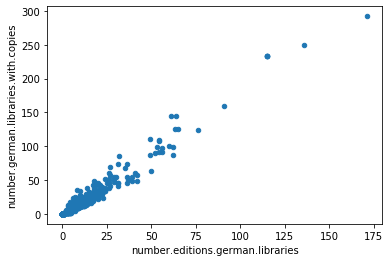

In [19]:
metadata_recategorized.plot.scatter('number.editions.german.libraries', 'number.german.libraries.with.copies')

In [20]:
metadata_recategorized.sort_values(by="number.editions.german.libraries")

idno   author.name        title  year supergenre   genre  \
ne0194  ne0194         Lanza     CunaFosa  1883  narrative  novela   
ne0293  ne0293        Sender  LugarHombre  1939  narrative  novela   
ne0292  ne0292        Sender   WittCanton  1935  narrative  novela   
ne0291  ne0291        Azorin        Tomas  1915  narrative       ?   
ne0290  ne0290         Lanza      Gusanos  1909  narrative  novela   
...        ...           ...          ...   ...        ...     ...   
ne0323  ne0323        Galdos   Fortunata3  1886  narrative  novela   
ne0322  ne0322        Galdos   Fortunata2  1886  narrative  novela   
ne0321  ne0321        Galdos   Fortunata1  1886  narrative  novela   
ne0210  ne0210        Valdes         Jose  1885  narrative  novela   
ne0127  ne0127  RamonJimenez      Platero  1917  narrative       ?   

       subgenre.cligs.important author.country  author.viaf author.bne  ...  \
ne0194                  realist          Spain   24624818.0   XX952949  ...   
ne0293               historical          Spain   14776690.0   XX932757  ...   
ne0292               historical          Spain   14776690.0   XX932757  ...   
ne0291            bildungsroman          Spain    2479761.0   XX825215  ...   
ne0290                  realist          Spain   24624818.0   XX952949  ...   
...                         ...            ...          ...        ...  ...   
ne0323                  realist          Spain   71395987.0  XX1014802  ...   
ne0322                  realist          Spain   71395987.0  XX1014802  ...   
ne0321                  realist          Spain   71395987.0  XX1014802  ...   
ne0210                  realist          Spain   61554068.0  XX1035048  ...   
ne0127         autobiographical          Spain   59077345.0   XX826262  ...   

       setting.type_ordinal time.period_ordinal protagonist.age_ordinal  \
ne0194                    1                   3                       1   
ne0293                    1                   3                       2   
ne0292                    2                   3                       3   
ne0291                    2                   2                       0   
ne0290                    1                   3                       2   
...                     ...                 ...                     ...   
ne0323                    3                   3                       1   
ne0322                    3                   3                       1   
ne0321                    3                   3                       1   
ne0210                    1                   3                       2   
ne0127                    1                   3                       2   

       protagonist.socLevel_ordinal end_ordinal representation_ordinal  \
ne0194                            0           0                      2   
ne0293                            0           0                      2   
ne0292                            1           2                      2   
ne0291                            1           2                      2   
ne0290                            1           0                      2   
...                             ...         ...                    ...   
ne0323                            2           0                      2   
ne0322                            2           0                      2   
ne0321                            2           0                      2   
ne0210                            0           4                      2   
ne0127                            1           0                      2   

       author.surname number.editions.german.libraries  \
ne0194          Lanza                                0   
ne0293         Sénder                                0   
ne0292         Sénder                                0   
ne0291          Ruiz                                 0   
ne0290          Lanza                                0   
...               ...                              ...   
ne0323         Galdós   

In [21]:
metadata_recategorized["number.publishers.amazon"] = metadata_recategorized['subgenre.edit.amazon'].str.count(";")

In [22]:
metadata_recategorized.rename(columns={'litHist.pages': 'number.pages.litHist.MdLE'}, inplace=True)


In [23]:
metadata_recategorized.to_csv("./../data/metadata_recategorized_with_K10.tsv", sep="\t")

In [24]:
1+1

2